## Mathsolve - Photomath demo project

The goal of this project is to make a model which would be able to detect handwritten math symbols on a picture. After detecting math symbols the app should be able to solve simple mathematical problem given on a picture (addition, subtraction, multiplication and divison).

### Dataset preparation for model building

In [1]:
# import useful libraries
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# path to the main dataset directory
dataset_main_path = r"C:\Users\Korisnik\git_workspace\MathSolve\dataset"

In [4]:
# dataset path object
dataset_path_object = pathlib.Path(dataset_main_path)

In [5]:
# dictionary with class names and all associated image paths
image_paths_dict = {}

# list of casses present in the dataset
dataset_classes = os.listdir(dataset_main_path)

for image_class in dataset_classes:
    image_paths_dict[image_class]=[image_path for image_path in dataset_path_object.glob('{}/*'.format(image_class))]

In [6]:
# check 
image_paths_dict

{'0': [WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/0CdBlhLw.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/10014.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/1058.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/10679.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/10825.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/10892.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/10941.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/10970.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/1199.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/12488.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/12580.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/dataset/0/12643.jpg'),
  WindowsPath('C:/Users/Korisnik/g

Now that we have all image paths associated with classes, we need to assign labels to each class.

In [7]:
# class labels dictionary
class_labels_dict = dict()

i = 0

for image_class in dataset_classes:
    class_labels_dict[image_class] = i
    i+=1

In [8]:
# check
class_labels_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'add': 10,
 'dec': 11,
 'div': 12,
 'eq': 13,
 'mul': 14,
 'sub': 15,
 'x': 16,
 'y': 17,
 'z': 18}

Let's read first image of class 0 into numpy array with help of opencv.

In [9]:
img = cv.imread(str(image_paths_dict['0'][0]))

img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
# check shape
img.shape

(400, 400, 3)

We need to resize all images to some standard shape. Dataset contains some images 400x400 pixels, and some 155x155 pixels, but we need all images to be the same shape (model expects all samples to be the same dimension). We'll write function that will loop through all images and resize them to 155x155 pixels. 

In [11]:
def resize_images(dataset, labels, pixels_height, pixels_width):
    """This function resizes all images in the dataset to desired pixels height and pixels width.
    
    Args:
        dataset (dict): Dictionary with class names and all associated image paths.
        labels (dict): Dictionary with class names associated with corresponding labels 
        pixels_height (int): Desired height of the resized image in pixels.
        pixels_height (int): Desired width of the resized image in pixels.
    Returns:
        X (list): List of resized images.
        y (list): List of labels corresponding to list of.
    """
    X, y = [], []
    
    for class_name, images in dataset.items():
        for image in images:
                img = cv.imread(str(image))
                try:
                    resized_image = cv.resize(img, (pixels_height, pixels_width))
                    X.append(resized_image)
                    y.append(labels[class_name])
                except:
                    break
    return X, y

In [12]:
# create dataset prepared for train test split
X, y = resize_images(image_paths_dict, class_labels_dict, 150, 150)

In [13]:
len(X), len(y)

(10862, 10862)

In [14]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [15]:
# convert python list to numpy array
X = np.array(X)
y = np.array(y)

In [16]:
# make a default train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [17]:
# check 
len(X_train), len(X_test)

(8146, 2716)

In [18]:
# scaling of the array (dividing RGB channel with 255)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Building a model 

In [19]:
num_classes = 19

In [20]:
# build convolutional neural network
model = Sequential([
    layers.Conv2D(16, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(num_classes)
])

In [21]:
# compile the model 
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ["accuracy"])

In [22]:
# fit the model 
model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
255/255 [==============================] - 98s 382ms/step - loss: 1.5566 - accuracy: 0.5522
Epoch 2/15
255/255 [==============================] - 98s 385ms/step - loss: 0.4821 - accuracy: 0.8555
Epoch 3/15
255/255 [==============================] - 103s 403ms/step - loss: 0.1991 - accuracy: 0.9373
Epoch 4/15
255/255 [==============================] - 95s 374ms/step - loss: 0.0852 - accuracy: 0.9714
Epoch 5/15
255/255 [==============================] - 100s 392ms/step - loss: 0.0505 - accuracy: 0.9839
Epoch 6/15
255/255 [==============================] - 96s 375ms/step - loss: 0.0597 - accuracy: 0.9805
Epoch 7/15
255/255 [==============================] - 99s 390ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 8/15
255/255 [==============================] - 104s 408ms/step - loss: 0.0246 - accuracy: 0.9926
Epoch 9/15
255/255 [==============================] - 95s 373ms/step - loss: 0.0260 - accuracy: 0.9921
Epoch 10/15
255/255 [==============================] - 95s 372ms/step 

In [23]:
model.evaluate(X_test_scaled,y_test)

85/85 [==============================] - 13s 147ms/step - loss: 0.8957 - accuracy: 0.8649


[0.8956925272941589, 0.8648748397827148]

In [24]:
# Predictions for all the values in the test dataset
y_predicted = model.predict(X_test_scaled)

In [27]:
# list of predictions
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [28]:
# confusion matrix
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

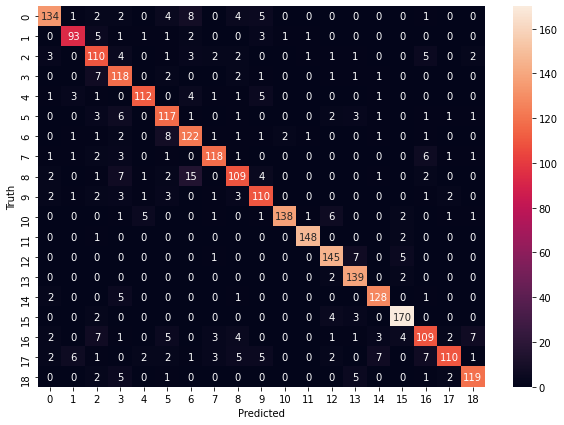

In [30]:
# confusion matrix plot with seaborn 
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Generally, predictions look good. Only problematic area is where model predicts 6, but the real value is 8. There are 15 such cases and we are going to look more into these.

In [31]:
# extract above mentioned images where true value is 8 but predicted value is 6
pos_indx = [] # indices where this is the case
for i in range(len(y_test)):
    if (y_test[i] == 8 and y_predicted_labels[i] == 6):
        pos_indx.append(i)

In [35]:
# check (expected output 15)
len(pos_indx)

15

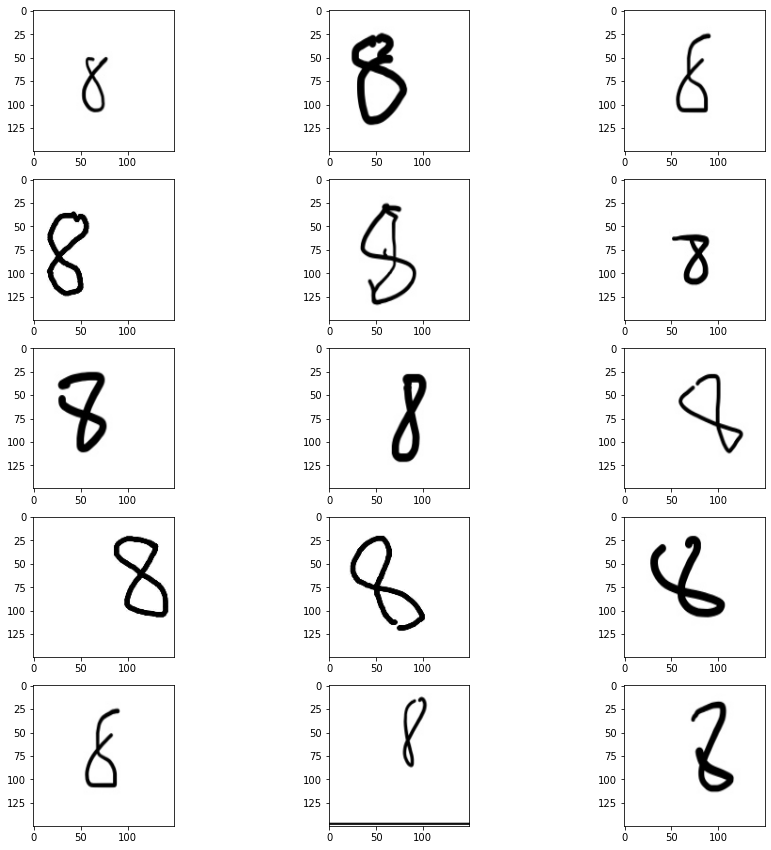

In [40]:
# inspect images
rows=5
cols = 3
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(pos_indx):
            axes[i, j].imshow(X_test[pos_indx[img_count]])
            img_count+=1

Most of them look fine but it is understandable that some of them are classified as 6, taking into account that some sixes in the dataset look like this:
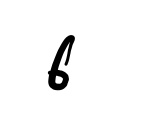